In [5]:
%load_ext autoreload
%autoreload 2

import warnings
import pandas as pd

warnings.simplefilter(
    action="ignore", category=(pd.errors.PerformanceWarning, RuntimeWarning)
)

from birdshot.io.files import list_patient_files
from birdshot.io.load import load_patient
from birdshot.chart.plot import plot_traces
from birdshot.analysis.filter import low_pass_filter
from birdshot.analysis.markers import extract_baseline_value
from birdshot.io.load import extract_markers
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


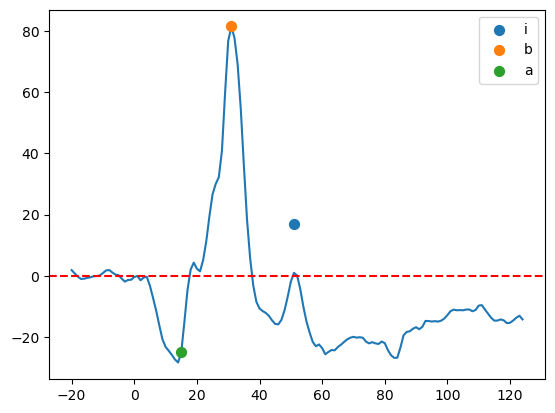

In [23]:
i = 3
patient = f"{i:0=3}"
patient_filepath = f"/home/clement/Documents/data/Birdshot/data/Patient {patient}/"
patients_data = list_patient_files(patient_filepath)


marker = extract_markers(patients_data["Photo"][0])
data = load_patient(patients_data["Photo"][0])
baseline = extract_baseline_value(data, data[("", "Time (ms)")])

step = 14
lat = "OS"
plt.plot(data[("", "Time (ms)")], data[(step, lat)])
plt.axhline(y=baseline[(step, lat)], color="r", linestyle="--")
if "i" in marker.columns.get_level_values(2):
    plt.scatter(
        marker[(step, lat, "i")].iloc[1],
        marker[(step, lat, "i")].iloc[0],
        s=50,
        zorder=10,
        label="i",
    )
if "b" in marker.columns.get_level_values(2):
    plt.scatter(
        marker[(step, lat, "b")].iloc[1],
        marker[(step, lat, "b")].iloc[0] + marker[(step, lat, "a")].iloc[0],
        s=50,
        zorder=10,
        label="b",
    )
if "a" in marker.columns.get_level_values(2):
    plt.scatter(
        marker[(step, lat, "a")].iloc[1],
        marker[(step, lat, "a")].iloc[0],
        s=50,
        zorder=10,
        label="a",
    )
plt.legend()
plt.show()